In [142]:
import ROOT
from matplotlib import pyplot as plt
import pandas as pd

In [338]:
file_name = "simhit_histograms.root"
my_file = ROOT.TFile.Open(file_name)

In [339]:
#open file and read in histograms
my_file.cd()
histograms = {}
for key in my_file.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
    

In [357]:
# loop over all histograms and retrieve mean and std dev

def parse_hist_name(hist_name):
    l1 = l2 = l3 = -1
    cut = "minus one"
    if len(hist_name.split("_")) > 1:
        (cut, l1, l2, l3) = hist_name.split("_")
    return (cut, int(l1), int(l2), int(l3)) 

df = pd.DataFrame(columns=["cut", "entries", "mean", "std dev", "triplet ID", "layer 1", "layer 2", "layer 3", "label"])
cuts = ["dca", "theta", "rc", "dcaRc"]
for hist_name in histograms:
    (cut, layer1, layer2, layer3) = parse_hist_name(hist_name)
    mean = histograms[hist_name].GetMean()
    stddev = histograms[hist_name].GetStdDev()
    entries = histograms[hist_name].GetEntries()

    if cut != "minus one":
        df_tmp = pd.DataFrame({"cut": cut, 
                               "entries": entries, 
                               "mean": mean, 
                               "std dev":stddev, 
                               "triplet ID":-1, 
                               "layer 1": layer1,
                               "layer 2": layer2,
                               "layer 3": layer3,
                               "label": str(layer1) + "_" + str(layer2) + "_" + str(layer3)}, index=[0])
        df = pd.concat([df, df_tmp], ignore_index=True)
df    

/var/folders/0m/wpyd3rf50ndd6p3t8qxnqkjm0000gn/T/ipykernel_71395/2678168608.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_tmp], ignore_index=True)


,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3,label
0,dca,1063646.0,0.274710,0.349064,-1,0,1,2,0_1_2
1,dca,124799.0,0.513471,0.726264,-1,0,1,4,0_1_4
2,dca,61697.0,0.147768,0.258121,-1,0,1,7,0_1_7
3,dca,314042.0,0.221475,0.273081,-1,0,1,3,0_1_3
4,dca,32667.0,0.670530,1.204985,-1,0,4,5,0_4_5
...,...,...,...,...,...,...,...,...,...
267,theta,315.0,1.128624,0.976185,-1,8,9,11,8_9_11
268,theta,85.0,0.444096,0.296865,-1,8,10,11,8_10_11
269,theta,465.0,0.107169,0.362367,-1,3,10,11,3_10_11
270,theta,351.0,0.467443,0.949310,-1,6,10,11,6_10_11


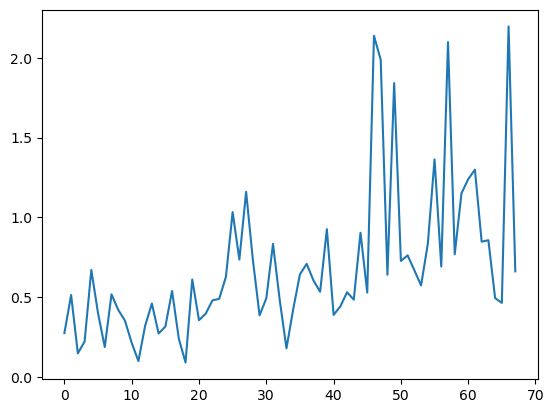

In [358]:
plt.plot( df.loc[df["cut"]=="dca","mean"])

In [359]:
hasStrip = (df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)
hasNoStrip =  (df["layer 2"] != 10) & (df["layer 2"] != 11) & (df["layer 3"] != 10) & (df["layer 3"] != 11)

In [360]:
df[hasStrip & (df["entries"] > 30) & (df["cut"] == "dca")]

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3,label
6,dca,62032.0,0.187608,0.630749,-1,0,4,10,0_4_10
7,dca,4155.0,0.518026,1.063912,-1,0,4,11,0_4_11
10,dca,986.0,0.213629,0.235752,-1,0,7,10,0_7_10
11,dca,23357.0,0.099386,0.337684,-1,0,7,11,0_7_11
15,dca,12628.0,0.315288,0.283853,-1,0,2,10,0_2_10
17,dca,9969.0,0.240127,0.513351,-1,0,5,10,0_5_10
18,dca,22048.0,0.090647,0.311341,-1,0,5,11,0_5_11
20,dca,23260.0,0.355726,0.824192,-1,0,8,10,0_8_10
21,dca,2016.0,0.396291,0.548837,-1,0,8,11,0_8_11
25,dca,17795.0,1.033194,1.129788,-1,1,2,10,1_2_10


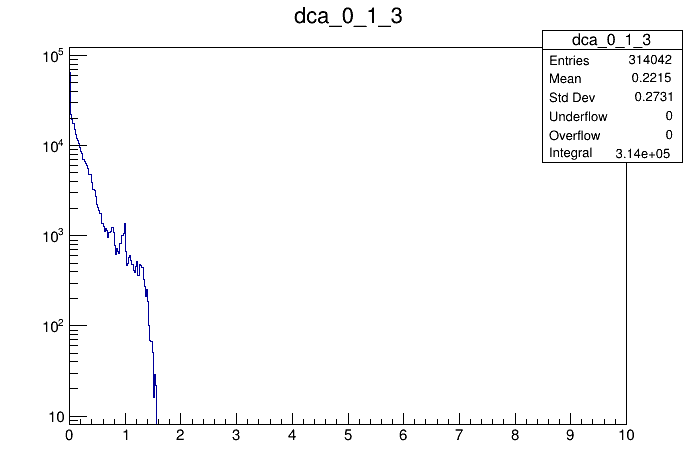

In [361]:
c = ROOT.TCanvas()
histograms["dca_0_1_3"].Draw()
ROOT.gStyle.SetOptStat(1111111)
c.SetLogy()
c.Draw()

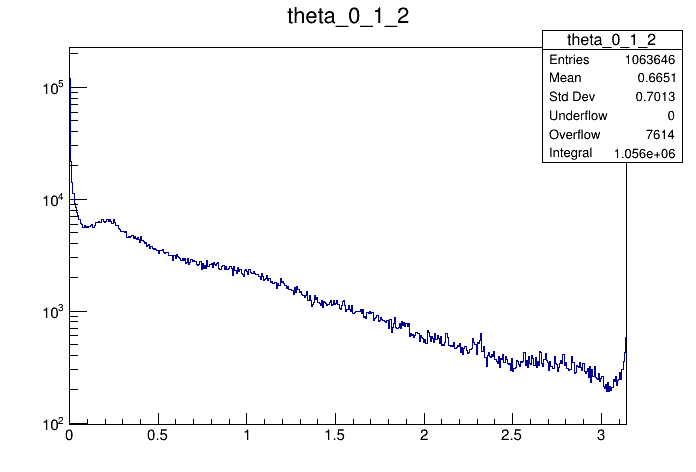

In [362]:
c = ROOT.TCanvas()
histograms["theta_0_1_2"].Draw()
ROOT.gStyle.SetOptStat(1111111)
c.SetLogy()
c.Draw()

In [363]:
df[hasNoStrip & (df["entries"] > 0) & (df["cut"] == "dca")]

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3,label
0,dca,1063646.0,0.274710,0.349064,-1,0,1,2,0_1_2
1,dca,124799.0,0.513471,0.726264,-1,0,1,4,0_1_4
2,dca,61697.0,0.147768,0.258121,-1,0,1,7,0_1_7
3,dca,314042.0,0.221475,0.273081,-1,0,1,3,0_1_3
4,dca,32667.0,0.670530,1.204985,-1,0,4,5,0_4_5
5,dca,22114.0,0.399325,0.905187,-1,0,4,6,0_4_6
8,dca,2831.0,0.420495,0.545320,-1,0,7,8,0_7_8
9,dca,4692.0,0.352586,0.477993,-1,0,7,9,0_7_9
12,dca,306314.0,0.320900,0.493585,-1,0,2,3,0_2_3
13,dca,48163.0,0.460138,0.649836,-1,0,2,4,0_2_4


In [364]:
#adding a figure of merit:
df["FoM"] = df["mean"] + df["std dev"]

In [365]:
#How many events survive the FoM cut?

fom_efficiency = []
for index, row in df.iterrows():
    hist_name = row["cut"] + "_" + str(row["layer 1"]) + "_" + str(row["layer 2"]) + "_" + str(row["layer 3"])
    fom = row["FoM"]
    n = histograms[hist_name].Integral(0, int(histograms[hist_name].FindFixBin(fom)))
    d = histograms[hist_name].Integral(0, int(histograms[hist_name].FindFixBin(5000)))
    fom_efficiency.append(n/d)

df["FoM efficiency"] = fom_efficiency

df


,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3,label,FoM,FoM efficiency
0,dca,1063646.0,0.274710,0.349064,-1,0,1,2,0_1_2,0.623773,0.882875
1,dca,124799.0,0.513471,0.726264,-1,0,1,4,0_1_4,1.239735,0.897018
2,dca,61697.0,0.147768,0.258121,-1,0,1,7,0_1_7,0.405889,0.875829
3,dca,314042.0,0.221475,0.273081,-1,0,1,3,0_1_3,0.494556,0.878640
4,dca,32667.0,0.670530,1.204985,-1,0,4,5,0_4_5,1.875515,0.881532
...,...,...,...,...,...,...,...,...,...,...,...
267,theta,315.0,1.128624,0.976185,-1,8,9,11,8_9_11,2.104809,0.803175
268,theta,85.0,0.444096,0.296865,-1,8,10,11,8_10_11,0.740961,0.917647
269,theta,465.0,0.107169,0.362367,-1,3,10,11,3_10_11,0.469536,0.982796
270,theta,351.0,0.467443,0.949310,-1,6,10,11,6_10_11,1.416754,0.874644


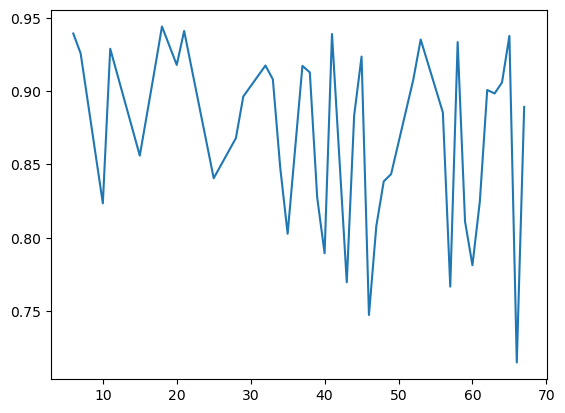

In [366]:
plt.plot(df.loc[(df["cut"]=="dca") & (hasStrip),"FoM efficiency"])

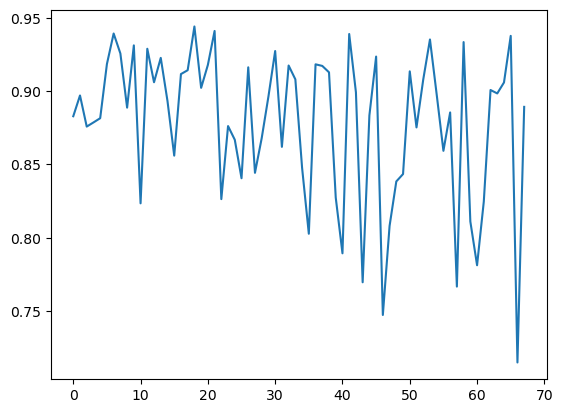

In [367]:
plt.plot(df.loc[(df["cut"]=="dca"),"FoM efficiency"])